# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

 **Импортируем библиотеку pandas. Считываем данные из csv-файла в датафрейм и сохраняем в переменную data:**

In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/volsi/Documents/Обучение Яндекс/Проекты/Исследование объявлений о продаже квартир/real_estate_data.csv', sep='\t')

**Выводим первые 10 строк датафрейма data на экран:**

In [3]:
print (data.head(10)) #вывод 10 первых строк

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

**Выводим основную информацию о датафрейме:**

In [4]:
data.info() #вывод информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Строим общую гистограмму для всех числовых столбцов таблицы:**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

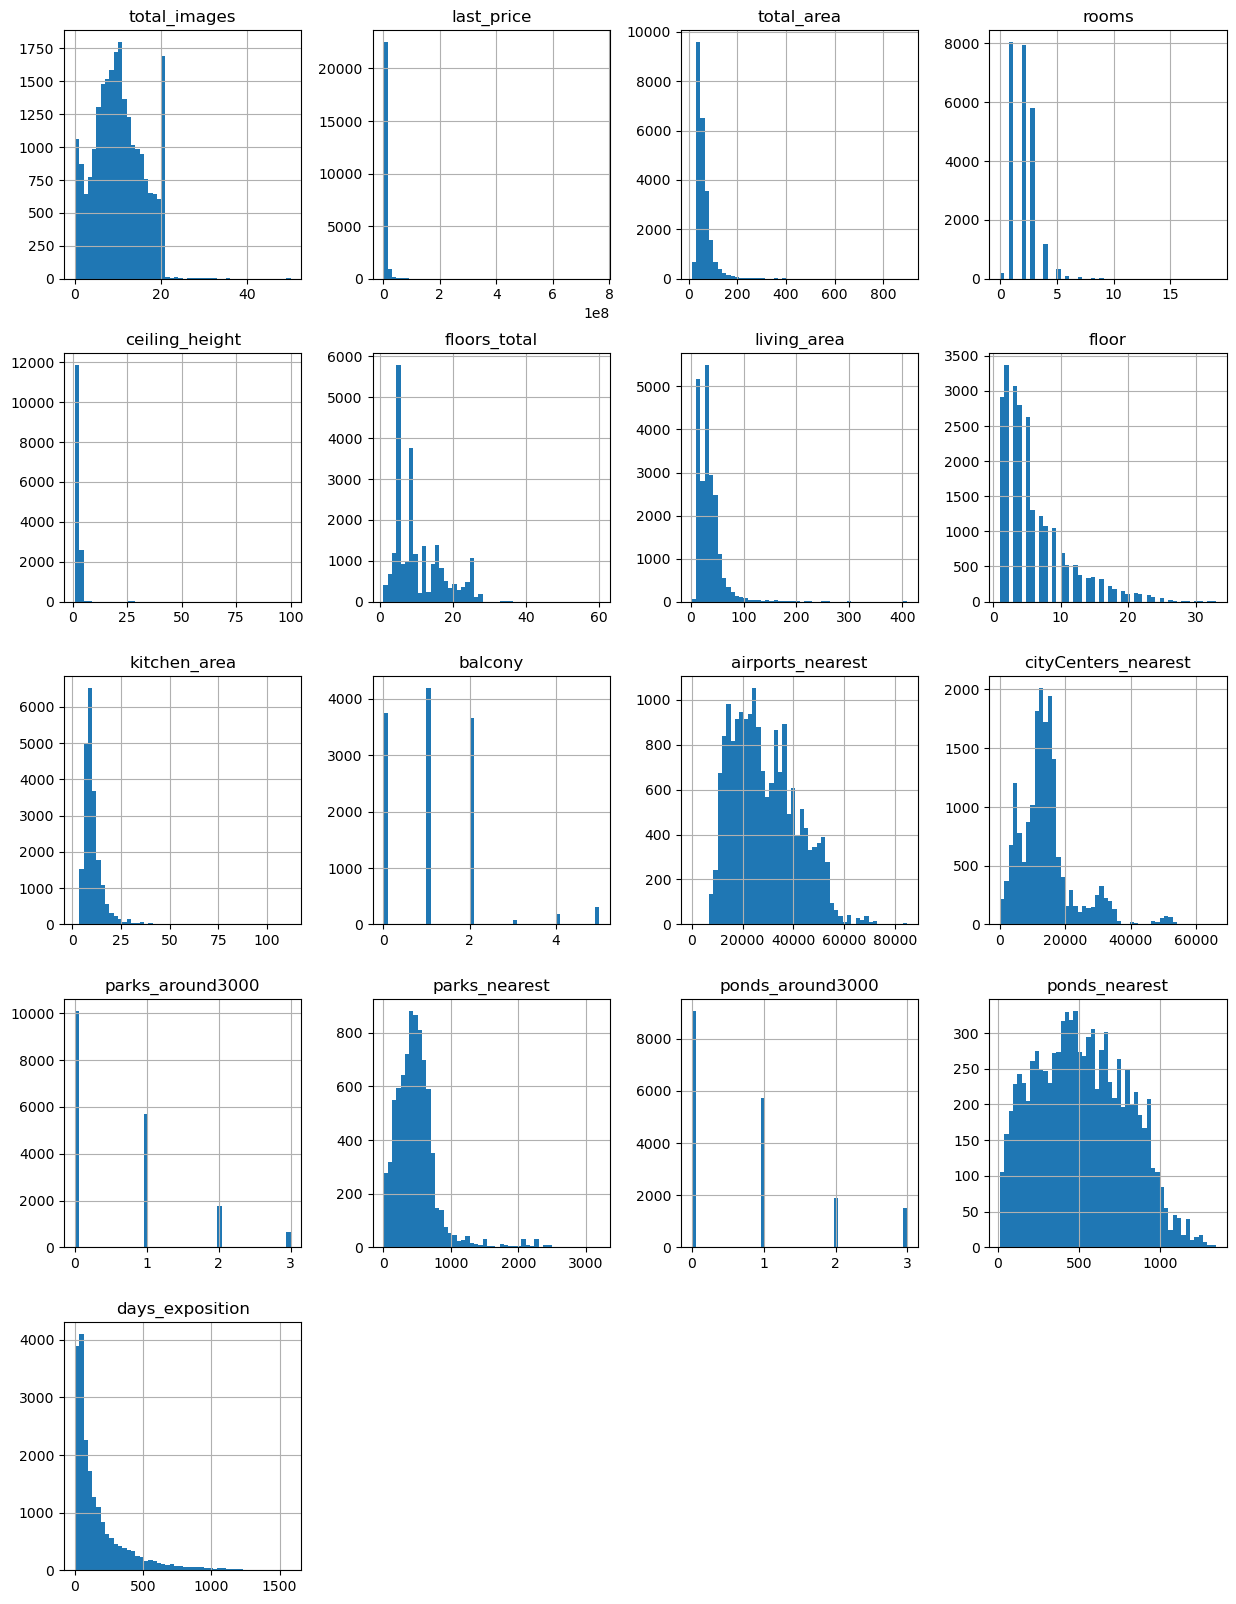

In [5]:
data.hist(bins=50, figsize=(15, 20)) #построение гистограм по каждому столбцу

**Посчитаем количество явных дубликатов:**

In [6]:
data.duplicated().sum() #считаем дубликаты

0

**Выводы из части 1:**

1. В данных есть пропуски;
2. На некоторых графиках видны несколько пиков, что требует более подробного анализа;
3. Судя по большому размеру пустой области графиков, имеют место значения, сильно отличающиеся от большинства;
4. Некоторые значения могли бы иметь другой тип данных по смыслу;
5. Явные дубликаты в данных отсутствуют.

### Предобработка данных

**Выведем количество пропущенных значений для каждого столбца, отсортировнное по убыванию:**

In [7]:
print (data.isna().sum().sort_values(ascending = False))


is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64


**Заполним пропуски в столбце "balcony" нулями (если продавец не указал количество балконов, то их скорее всего нет):**

In [8]:
data['balcony'].where(data['balcony'].notna(),0,inplace=True) #заменяем пропуски на нули

In [9]:
(data['balcony'].isna().sum()) #проверяем, сколько осталось пропусков в этом столбце

0

**Проверим столбец с наибольшим числом пропусков 'is_apartment':**

In [10]:
data['is_apartment'].value_counts() # смотрим, какие значения есть. Если только True, то можно предположить, что остальные False

False    2725
True       50
Name: is_apartment, dtype: int64

**Предположение о том, что все заполненные значения являются True, не оправдалось. Оставляем столбец как есть.**

**Промежуточные выводы:**

1. В датафрейме достаточно много пропусков. 
2. Пропуски есть как в картографических данных, так и в заполняемых пользователем. 
3. Предроложительно, пропуски в данных могут быть вызваны человеческим фактором, ошибками при выгрузке, либо сбоями в алгоритме заполнения некоторых полей. 
4. В некоторых столбцах, таких как "is_apartment" пустых ячеек на порядок больше, чем заполненных.
5. В заполняемых пользователем пропуски в столбце "balcony" заменены на 0, так как если продавец не указал количество балконов, то их скорее всего нет.

**Рассмотрим типы данных в каждом столбце:**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Думаю, неплохо бы поменять тип данных в следующих столбцах:** 
1. last_price - на int, так как нет смысла в копейках;
2. balcony - на int по смыслу;
3. first_day_exposition - на datetime по смыслу и для удобства последующих расчётов;
4. is_apartment - на bool по смыслу и описанию данных.

**Изменим тип данных:** 

In [12]:
data['last_price'] = data['last_price'].astype('int') # меняем тип столбца last_price на int
data['balcony'] = data['balcony'].astype('int') # меняем тип столбца balcony на int
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # меняем тип столбца first_day_exposition
data['is_apartment'] = data['is_apartment'].astype('bool') # меняем тип столбца is_apartment на булев
print(data['first_day_exposition'].head()) #выводим столбец first_day_exposition
data.info() #проверяем результат

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_pl

**Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты:**

In [13]:
print(data['locality_name'].unique()) #выводим список уникальных названий
print(len(data['locality_name'].unique())) #выводим количество уникальных названий

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [14]:
for i in range(len(data)):
    if 'поселок ' in str(data.loc[i,'locality_name']): 
        data.loc[i,'locality_name'] = data.loc[i,'locality_name'].replace('поселок ', '') #убираем часть строки
        #print(data.loc[i,'locality_name'])
    if 'городского типа ' in str(data.loc[i,'locality_name']):
        data.loc[i,'locality_name'] = data.loc[i,'locality_name'].replace('городского типа ', '')#убираем часть строки
        #print(data.loc[i,'locality_name'])
    if 'посёлок ' in str(data.loc[i,'locality_name']):
        data.loc[i,'locality_name'] = data.loc[i,'locality_name'].replace('посёлок ', '')#убираем часть строки
        #print(data.loc[i,'locality_name'])
    if 'городской ' in str(data.loc[i,'locality_name']):
        data.loc[i,'locality_name'] = data.loc[i,'locality_name'].replace('городской ', '')#убираем часть строки
        #print(data.loc[i,'locality_name'])
    if 'коттеджный ' in str(data.loc[i,'locality_name']):
        data.loc[i,'locality_name'] = data.loc[i,'locality_name'].replace('коттеджный ', '')#убираем часть строки
        #print(data.loc[i,'locality_name'])
    if 'деревня ' in str(data.loc[i,'locality_name']):
        data.loc[i,'locality_name'] = data.loc[i,'locality_name'].replace('деревня ', '')#убираем часть строки
        #print(data.loc[i,'locality_name'])
    if 'садовое товарищество ' in str(data.loc[i,'locality_name']):
        data.loc[i,'locality_name'] = data.loc[i,'locality_name'].replace('садовое товарищество ', '')#убираем часть строки
        #print(data.loc[i,'locality_name'])
    if 'село ' in str(data.loc[i,'locality_name']):
        data.loc[i,'locality_name'] = data.loc[i,'locality_name'].replace('село ', '')#убираем часть строки
        #print(data.loc[i,'locality_name'])    
    if 'станции ' in str(data.loc[i,'locality_name']):
        data.loc[i,'locality_name'] = data.loc[i,'locality_name'].replace('станции ', '')#убираем часть строки
        #print(data.loc[i,'locality_name']) 
    if 'при железнодорожной ' in str(data.loc[i,'locality_name']):
        data.loc[i,'locality_name'] = data.loc[i,'locality_name'].replace('при железнодорожной ', '')#убираем часть строки
        #print(data.loc[i,'locality_name'])  
    if 'садоводческое некоммерческое товарищество ' in str(data.loc[i,'locality_name']):
        data.loc[i,'locality_name'] = data.loc[i,'locality_name'].replace('садоводческое некоммерческое товарищество ', '')#убираем часть строки
        #print(data.loc[i,'locality_name'])     
print(len(data['locality_name'].unique())) #выводим количество уникальных названий

    

306


In [15]:
print(data['locality_name'].unique())    #выводим спсисок получившихся уникальных названий    

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодёжное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалёво' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' '

**Таким образом, из 365 уникальных названий после устранения неявных дубликатов осталось 306.**

**Найдём и устраним редкие и выбивающиеся значения, начнём со столбца "ceiling_height":**

<AxesSubplot:>

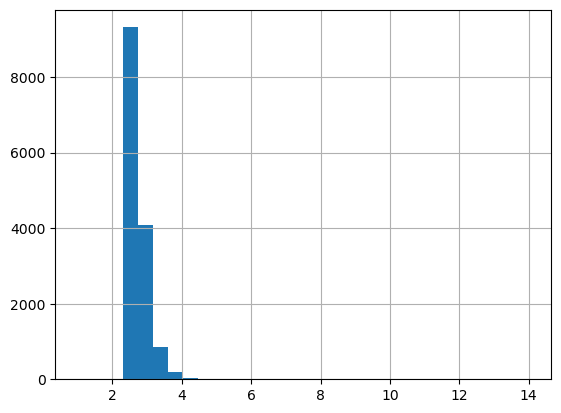

In [16]:
for i in range(len(data)): #цикл для выявления высот выше 20 метров для их последующего деления на 10
    if data.loc[i,'ceiling_height']>=20: 
        data.loc[i,'ceiling_height']/=10
        #print (data.loc[i,'ceiling_height']) #выводим промежуточный результат
data['ceiling_height'].hist(bins=30) #строим гистограмму   
        

**Удалим из датафрейма объявления с потолками ниже 2 метров или выше 5 метров:**

In [17]:
data = data.query('not(ceiling_height<2 or ceiling_height>5)') #фильтруем
print (len(data)) # выводим оставшееся количество строк

23682


**Перейдём к столбцу last_price, так как его гистограмма тоже выглядит подозрительно:**

count    2.368200e+04
mean     6.524879e+06
std      1.080867e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


<AxesSubplot:>

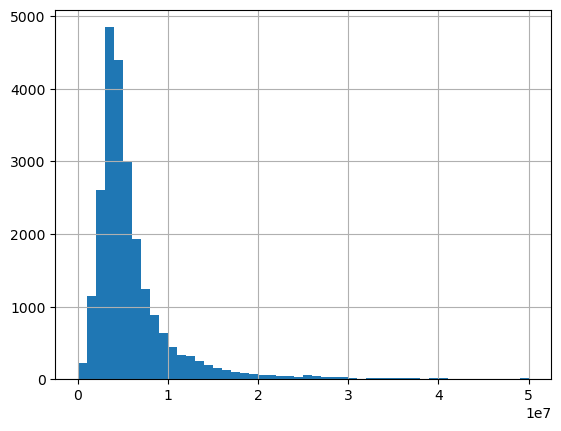

In [18]:
print(data['last_price'].describe()) #выводим описание столбца last_price
data['last_price'].hist(bins=50, range=(0, 50000000)) # выводим гистограмму со стоимостью до 50 миллионов

<AxesSubplot:>

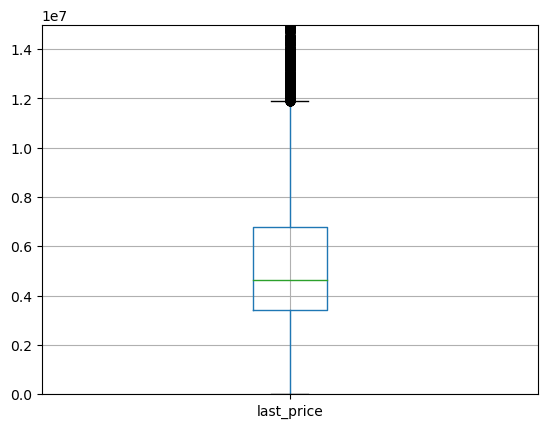

In [19]:
import matplotlib.pyplot as plt # импортируем matplotlib.pyplot
plt.ylim(0, 15000000) # выставляем масштаб
data.boxplot('last_price') #выводим ""ящик с усами

**Из графика следует, что значения больше  12 с небольшим миллионов можно считать выбросами. Поэтому удалим строки с ценой 40 млн. и больше из датафрейма.**

<AxesSubplot:>

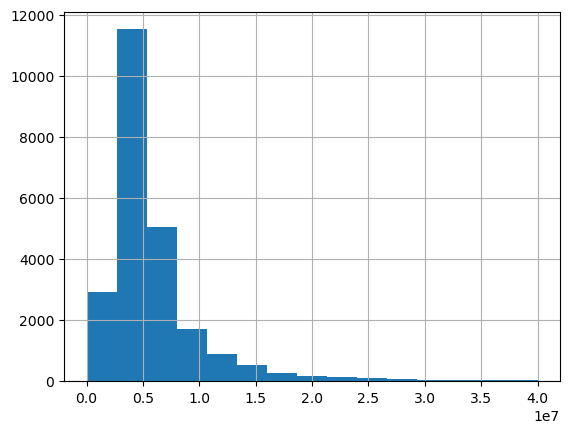

In [20]:
data = data.query('last_price<=40000000') #оставляем в датафрейме строки с ценой 40 млн. и меньше, пропусков в этом столбце нет
data['last_price'].hist(bins=15) #строим гистограмму

**Изучим столбцы, содержащие информацию о площади.** 

count    23504.00000
mean        58.94017
std         30.06076
min         12.00000
25%         40.00000
50%         52.00000
75%         69.00000
max        470.30000
Name: total_area, dtype: float64

count    21624.000000
mean        33.726566
std         19.360121
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        279.600000
Name: living_area, dtype: float64

count    21253.000000
mean        10.408535
std          5.340667
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        100.700000
Name: kitchen_area, dtype: float64


array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>, <AxesSubplot:>]],
      dtype=object)

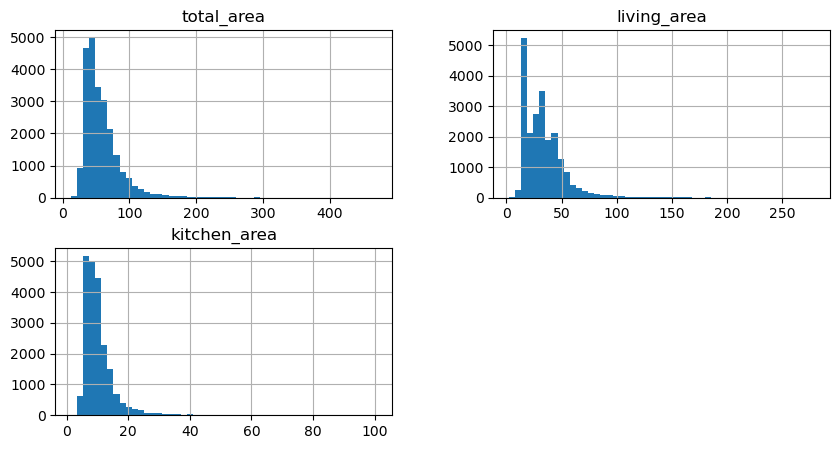

In [21]:
print(data['total_area'].describe())# выводим информацию о столбце
print()
print(data['living_area'].describe())# выводим информацию о столбце
print()
print(data['kitchen_area'].describe()) # выводим информацию о столбце
data[['total_area','living_area','kitchen_area']].hist(bins=50, figsize = (10,5)) # выводим гистограммы всех 3 столбцов

**Выводим ящик с усами:**

<AxesSubplot:>

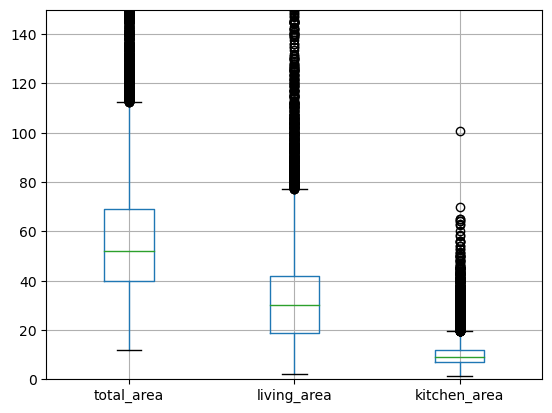

In [22]:
plt.ylim(0, 150) # выставляем масштаб
data.boxplot(['total_area','living_area','kitchen_area']) #выводим "ящик с усами"

**Из графика следует, что в этих столбцах есть выбросы, например значение 120 кв.метров в столбце total_area, судя по графику, является выбросом. Была идея, что выбросы в этой группе связаны с запятой не в том месте, но при этом определить точную границу, начиная с которой можно так считать, сложно. Например, площадь квартиры в 120 кв.метров не кажется достаточно большой, чтобы уверенно сказать, что хотели написать 12,0 кв.метров. Поэтому, чтобы не плодить новые ошибки, удалим из первого столбца значения больше 200, из второго - больше 150, а из третьего - больше 50.**

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>, <AxesSubplot:>]],
      dtype=object)

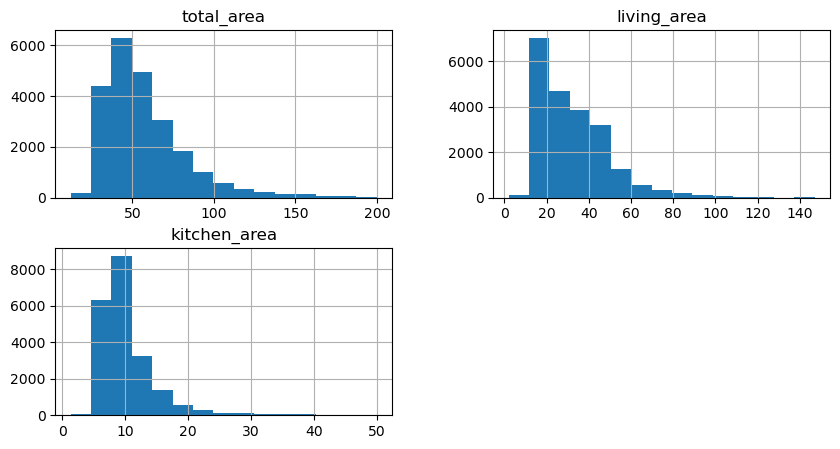

In [23]:
data = data.query('not(total_area > 200 or living_area > 150 or kitchen_area >50)') #оставляем в датафрейме строки, удовлетворяющие условиям
data[['total_area','living_area','kitchen_area']].hist(bins=15, figsize = (10,5)) #строим гистограммы

**Ещё смущает гистограмма по столбцу balcony. Удалим из датафрейма строки со значением в этом столбце больше 3:**

<AxesSubplot:>

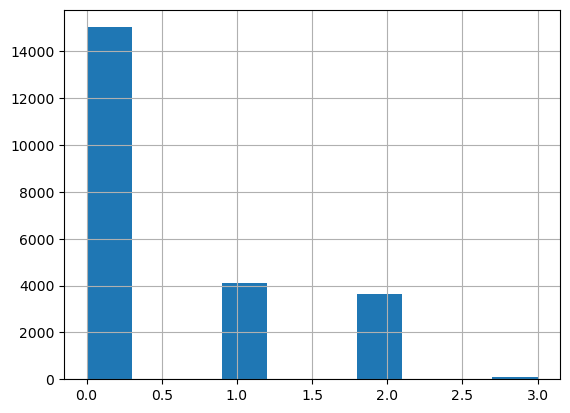

In [24]:
data = data.query('balcony<=3') #оставляем в датафрейме строки, удовлетворяющие условию.
data['balcony'].hist() #строим гистограмму

**Удалим также объявдения, в которых меньше 2 или больше 20 изображений, так как в первом случае объявления не вызывают доверия, а объявлений с количеством изображений больше 20 крайне мало:**

<AxesSubplot:>

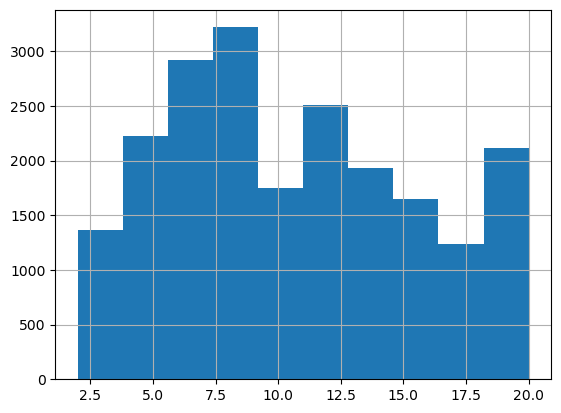

In [25]:
data = data.query('total_images > 1 and total_images <=20') #оставляем в датафрейме строки, удовлетворяющие условиям.
data['total_images'].hist() #строим гистограмму

**Выведем гистограммы по получившемуся датафрейму:**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'

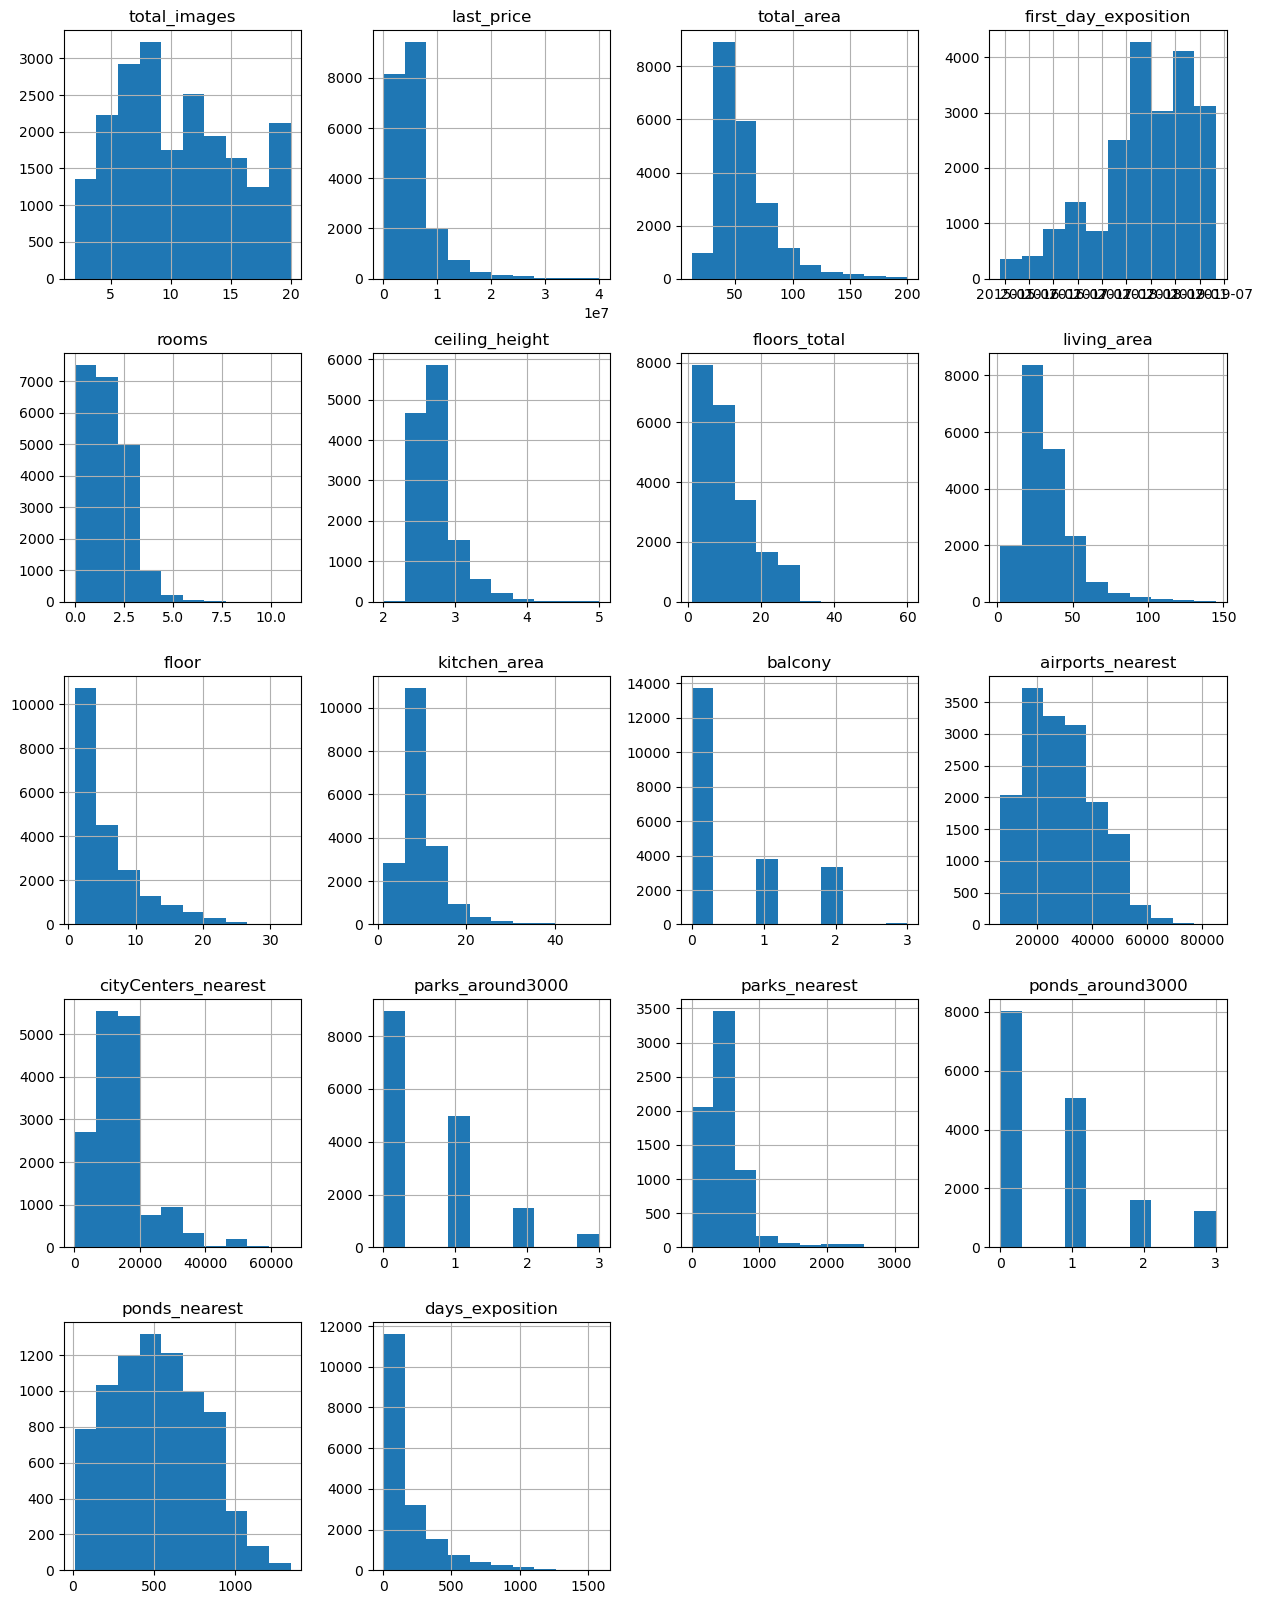

In [26]:
data.hist(bins=10, figsize=(15, 20)) #построение гистограм по каждому столбцу

**Вывод из части 2:**
Теперь гистограммы выглядят более реалистично. Пики могут объяснятся наличием в целом большего количества квартир определенной планировки и этажности, а также нахождением домов в разных населенных пунктах.

**Добавим новые столбцы:**

In [27]:
data['price_per_meter'] = data['last_price']/data['total_area'] #добавляем новый столбец price_per_meter
data['day_of_the_week'] = pd.DatetimeIndex(data['first_day_exposition']).weekday #добавляем новый столбец day_of_the_week
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month #добавляем новый столбец month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year #добавляем новый столбец year

In [28]:
for i in data.index: # цикл для создания нового столбца с разделением этажей на категории
    if data.loc[i, 'floor'] == 1:
        data.loc[i, 'floor_category'] = 'первый'
    elif   data.loc[i, 'floor'] ==  data.loc[i, 'floors_total']:
        data.loc[i, 'floor_category'] = 'последний'
    else: 
        data.loc[i, 'floor_category'] = 'другой'
      

In [29]:
data['km_to_cityCenter'] = (data['cityCenters_nearest']/1000).round() #добавляем новый столбец km_to_cityCenter, округляя до целых

**Вывод и части 3:** Новые столбцы "price_per_meter", "day_of_the_week", "month", "year" и "floor_category" добавлены, можно проводить по ним анализ.

### Исследовательский анализ данных

**Выведем гистограммы по 14 столбцам получившегося датафрейма:**

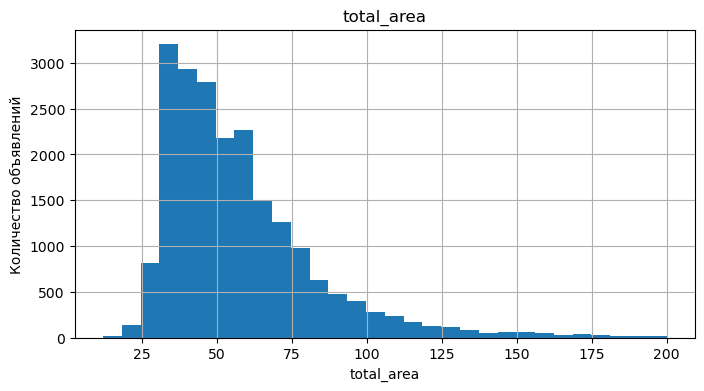

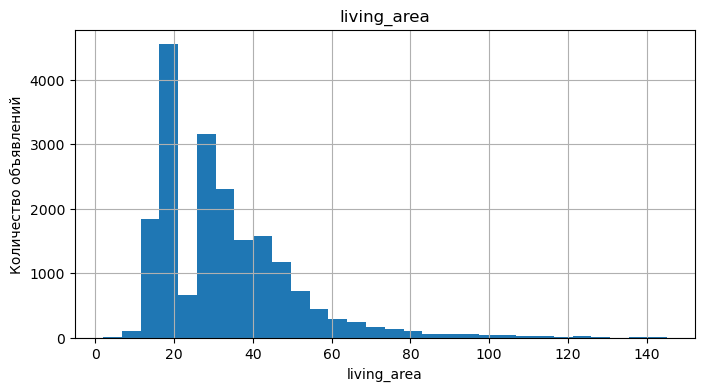

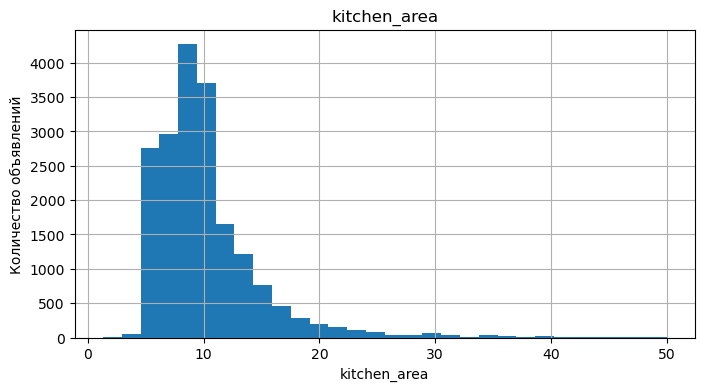

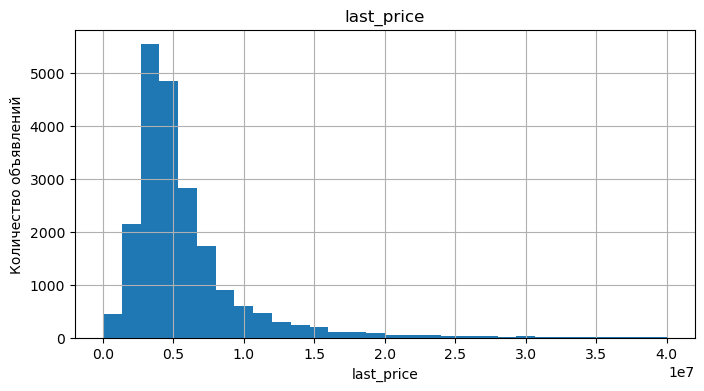

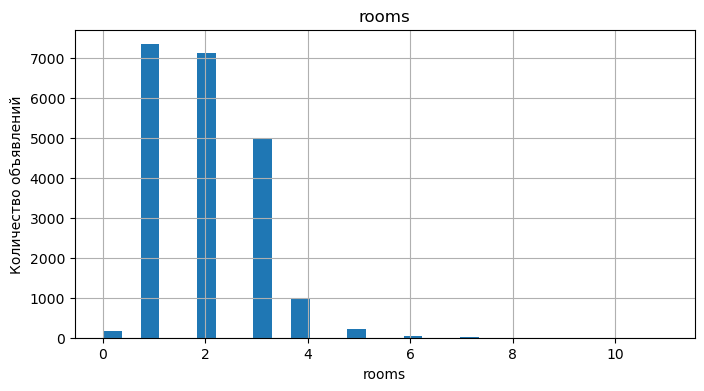

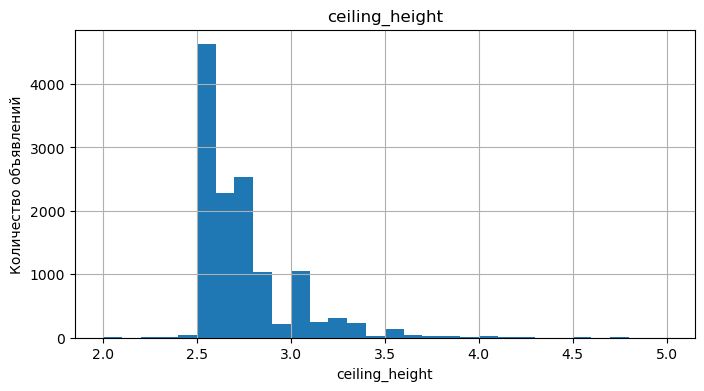

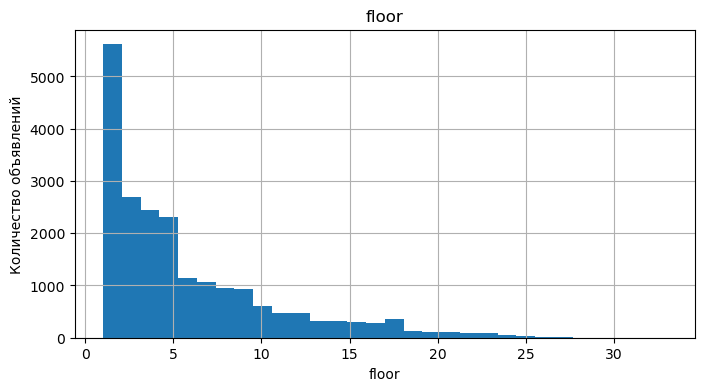

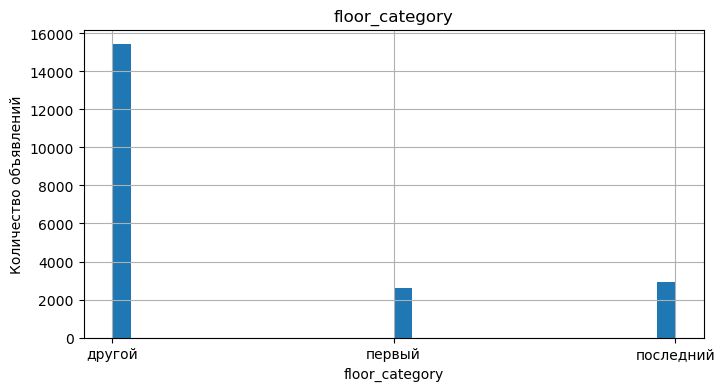

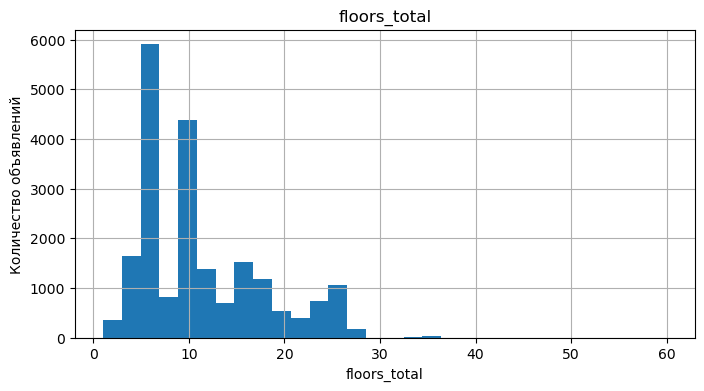

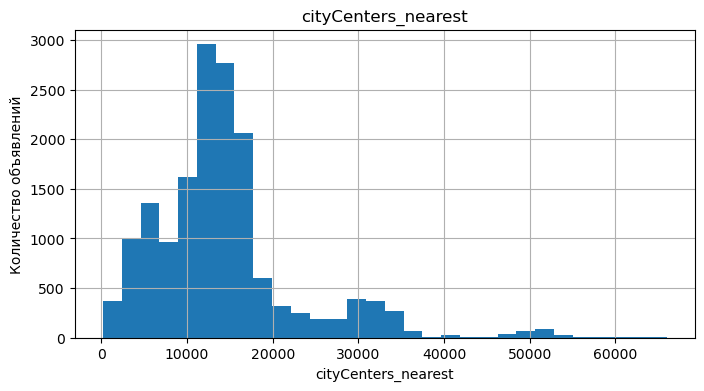

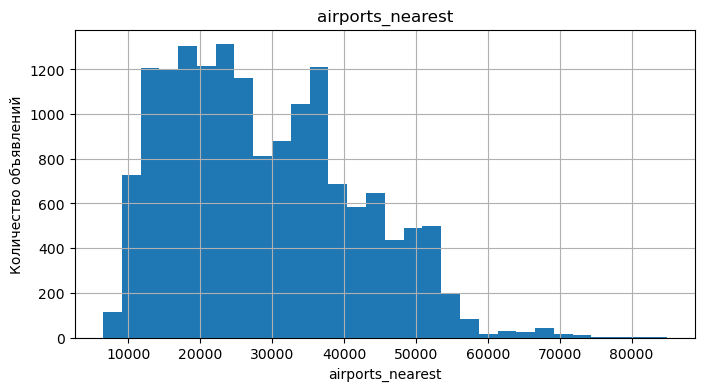

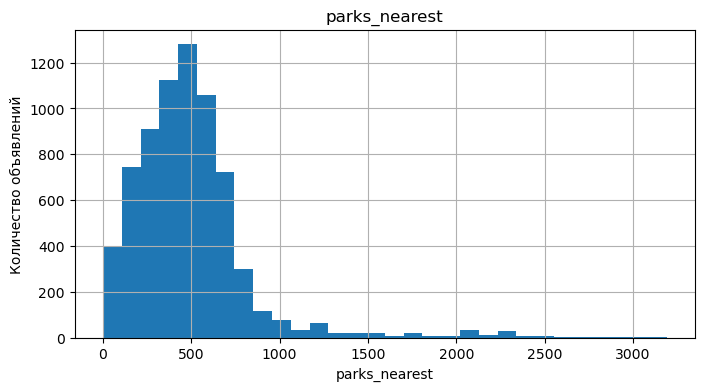

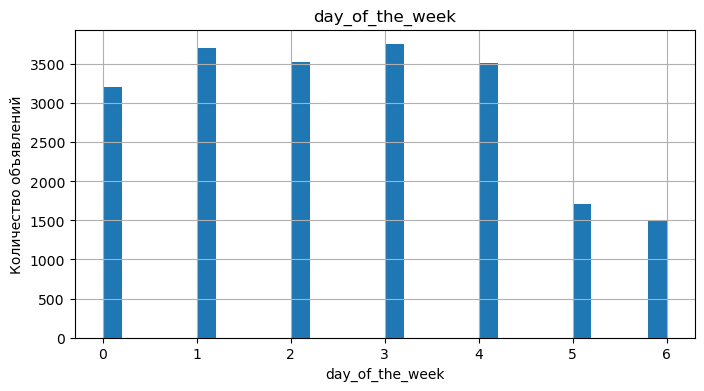

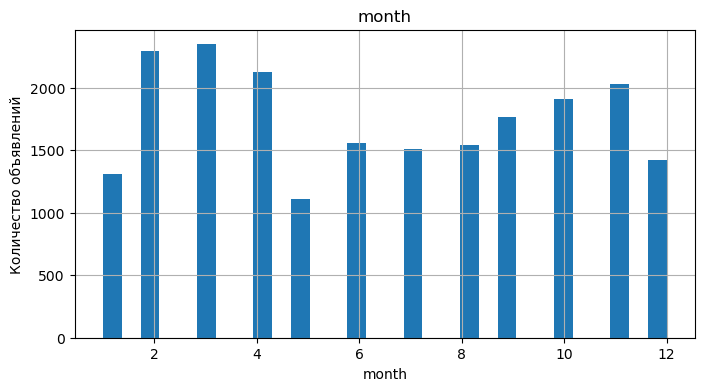

In [30]:
interesting_columns = ['total_area', 
                       'living_area', 
                       'kitchen_area', 
                       'last_price' ,
                       'rooms', 
                       'ceiling_height', 
                       'floor', 
                       'floor_category', 
                       'floors_total', 
                       'cityCenters_nearest', 
                       'airports_nearest', 
                       'parks_nearest', 
                       'day_of_the_week', 
                       'month']
for column_name in interesting_columns: #построение гистограм по указанным столбцам
    ax = data[column_name].hist(bins=30, figsize=(8,4))
    ax.set (xlabel=column_name, ylabel='Количество объявлений',
    title = column_name) 
    plt.show()
    

**Выводы по отдельным парметрам:**
   1. Общая площадь. Гистограмма показывает, что максимальное количество объявлений подано о квартирах площадью около 40 метров. 
        Имеются несколько пиков в районе 25, 45, 60 и 75 квадратных метров. Думаю, эти пики соответствуют наиболее распространенным
        площадям однокомнатных, двухкомнатных, трехкомнатных и т.д. квартир. 
   2. Жилая площадь. Также имеется несколько пиков, которые смещены влево относительно гистограммы общей площади, что логично. 
        Природа этих пиков должна быть такой же, как в предыдущем пункте.
   3. Площадь кухни.Распределение близко к нормальному. Наиболее распространена площадь кухни около 8 кв. метров.
   4. Цена объекта. Из гистограммы last_price следует, что больше всего квартир продано по цене около 4 млн. рублей. А из столбца
        price_per_meter следует, что наиболее частая цена кв. метра - около 90 тыс.рублей.
   5. Количество комнат. Однокомнатных и двухкомнатных квартир продано примерно одинаковое количество. Трехкомнатных - меньше на 
        треть. Остальных значительно меньше. Максимальное количество комнат, судя по графику, - 6.
   6. Высота потолков.Наиболее распространенная высота потолков - около 2,5 метров. Выше четырех метров потолков практически нет.
   7. Этаж квартиры. Наиболее распространенный этаж - второй. Возможно, это связано с тем, что Питере стоит на болотах.
   8. Тип этажа квартиры («первый», «последний», «другой»). Лбъявдений о продаже квартир на первом и последнем этажах примерно 
        равное количество (около 1500), на первом этаже чуть меньшше, возможно, из-за магазинов. В категории 'другой' больше 7500
        объявлений, то есть значительно больше.
   9. Общее количество этажей в доме. На гистограмме видны 2 высоких пика в районе 5 и 9 этажей. Предполагаю, что это связано с 
        преобладание домов такой этажности в исследуемой области.
   10. Расстояние до центра города в метрах. Гистограмма имеет 3 "холма". Предполагаю, что они соответствуют крупным населенным пунктам.
   11. Расстояние до ближайшего аэропорта. Как и в предыдущем случае, гистограмма имеет 3 "холма". Предполагаю, что они соответствуют 
        крупным населенным пунктам.
   12. Расстояние до ближайшего парка. В большинстве объявлений, где указано расстояние до парка, оно составляет от 0 до 1000 метров.
        В среднем расстояние до ближайшего парка в таких объявлениях составляет примерно 500 метров.
   13. День и месяц публикации объявления. Из соответствующих гистограмм следует, что в выходные публикуется меньше объявлений о 
        продаже квартир. По месяцам ситуация следующая. Количество объявлений растёт с мая по март, в апреле начинается спад. Имеет 
        место резкое снижение количества поданных объявлений в декабре и январе (около Нового Года).

**Изучим, как быстро продавались квартиры:**

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

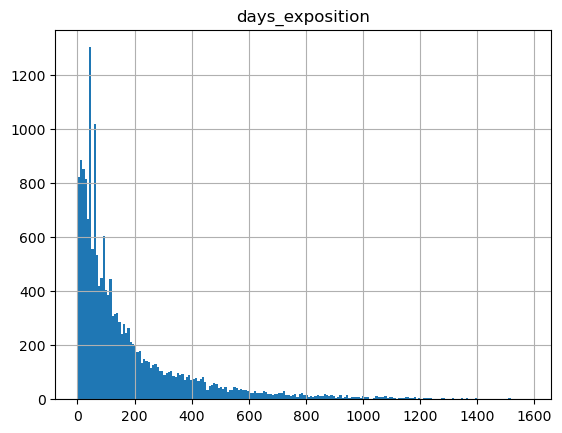

In [31]:
data.hist('days_exposition', bins=200) #построим гистограмму по days_exposition

**График напоминает распределение Пуассона.**

In [32]:
print ('Среднее арифметическое равно', data['days_exposition'].mean())

Среднее арифметическое равно 180.27093377666944


In [33]:
print ('Медиана равна', data['days_exposition'].median())

Медиана равна 97.0


<AxesSubplot:>

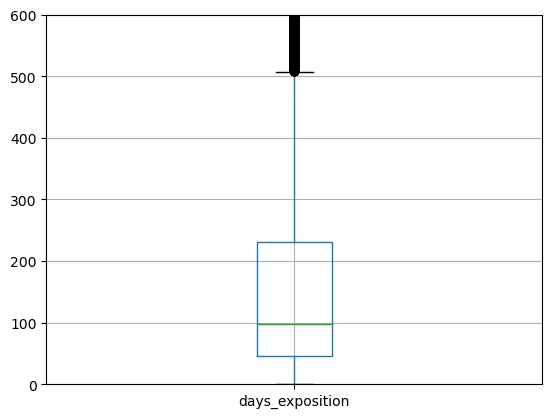

In [34]:
plt.ylim(0, 600) # выставляем масштаб
data.boxplot('days_exposition') #выводим "ящик с усами"

**Обычно продажа занимает от 50 до 240 дней, самое вероятное - это 102 дня.      
Продажи меньше 50 дней можно считать быстрыми (но обычными), а больше 520 — необычно долгими.**

**Построим матрицу корреляции по 8 столбцам(последней цене; общей площади; жилой площади; площади кухни; количеству комнат;
дате размещения (день недели, месяц, год):**

In [35]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'day_of_the_week', 'month', 'year']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,day_of_the_week,month,year
last_price,1.000000,0.770388,0.661946,0.584566,0.484698,-0.012964,-0.003837,-0.031320
total_area,0.770388,1.000000,0.925648,0.550927,0.795837,-0.012534,0.003553,-0.076335
living_area,0.661946,0.925648,1.000000,0.309581,0.877011,-0.008336,-0.009348,-0.063406
kitchen_area,0.584566,0.550927,0.309581,1.000000,0.183278,-0.012010,0.005409,-0.051290
rooms,0.484698,0.795837,0.877011,0.183278,1.000000,-0.001878,-0.006780,-0.045719
day_of_the_week,-0.012964,-0.012534,-0.008336,-0.012010,-0.001878,1.000000,0.010059,-0.005282
month,-0.003837,0.003553,-0.009348,0.005409,-0.006780,0.010059,1.000000,-0.267169
year,-0.031320,-0.076335,-0.063406,-0.051290,-0.045719,-0.005282,-0.267169,1.000000


**Построим матрицу диаграмм рассеяния:**

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubp

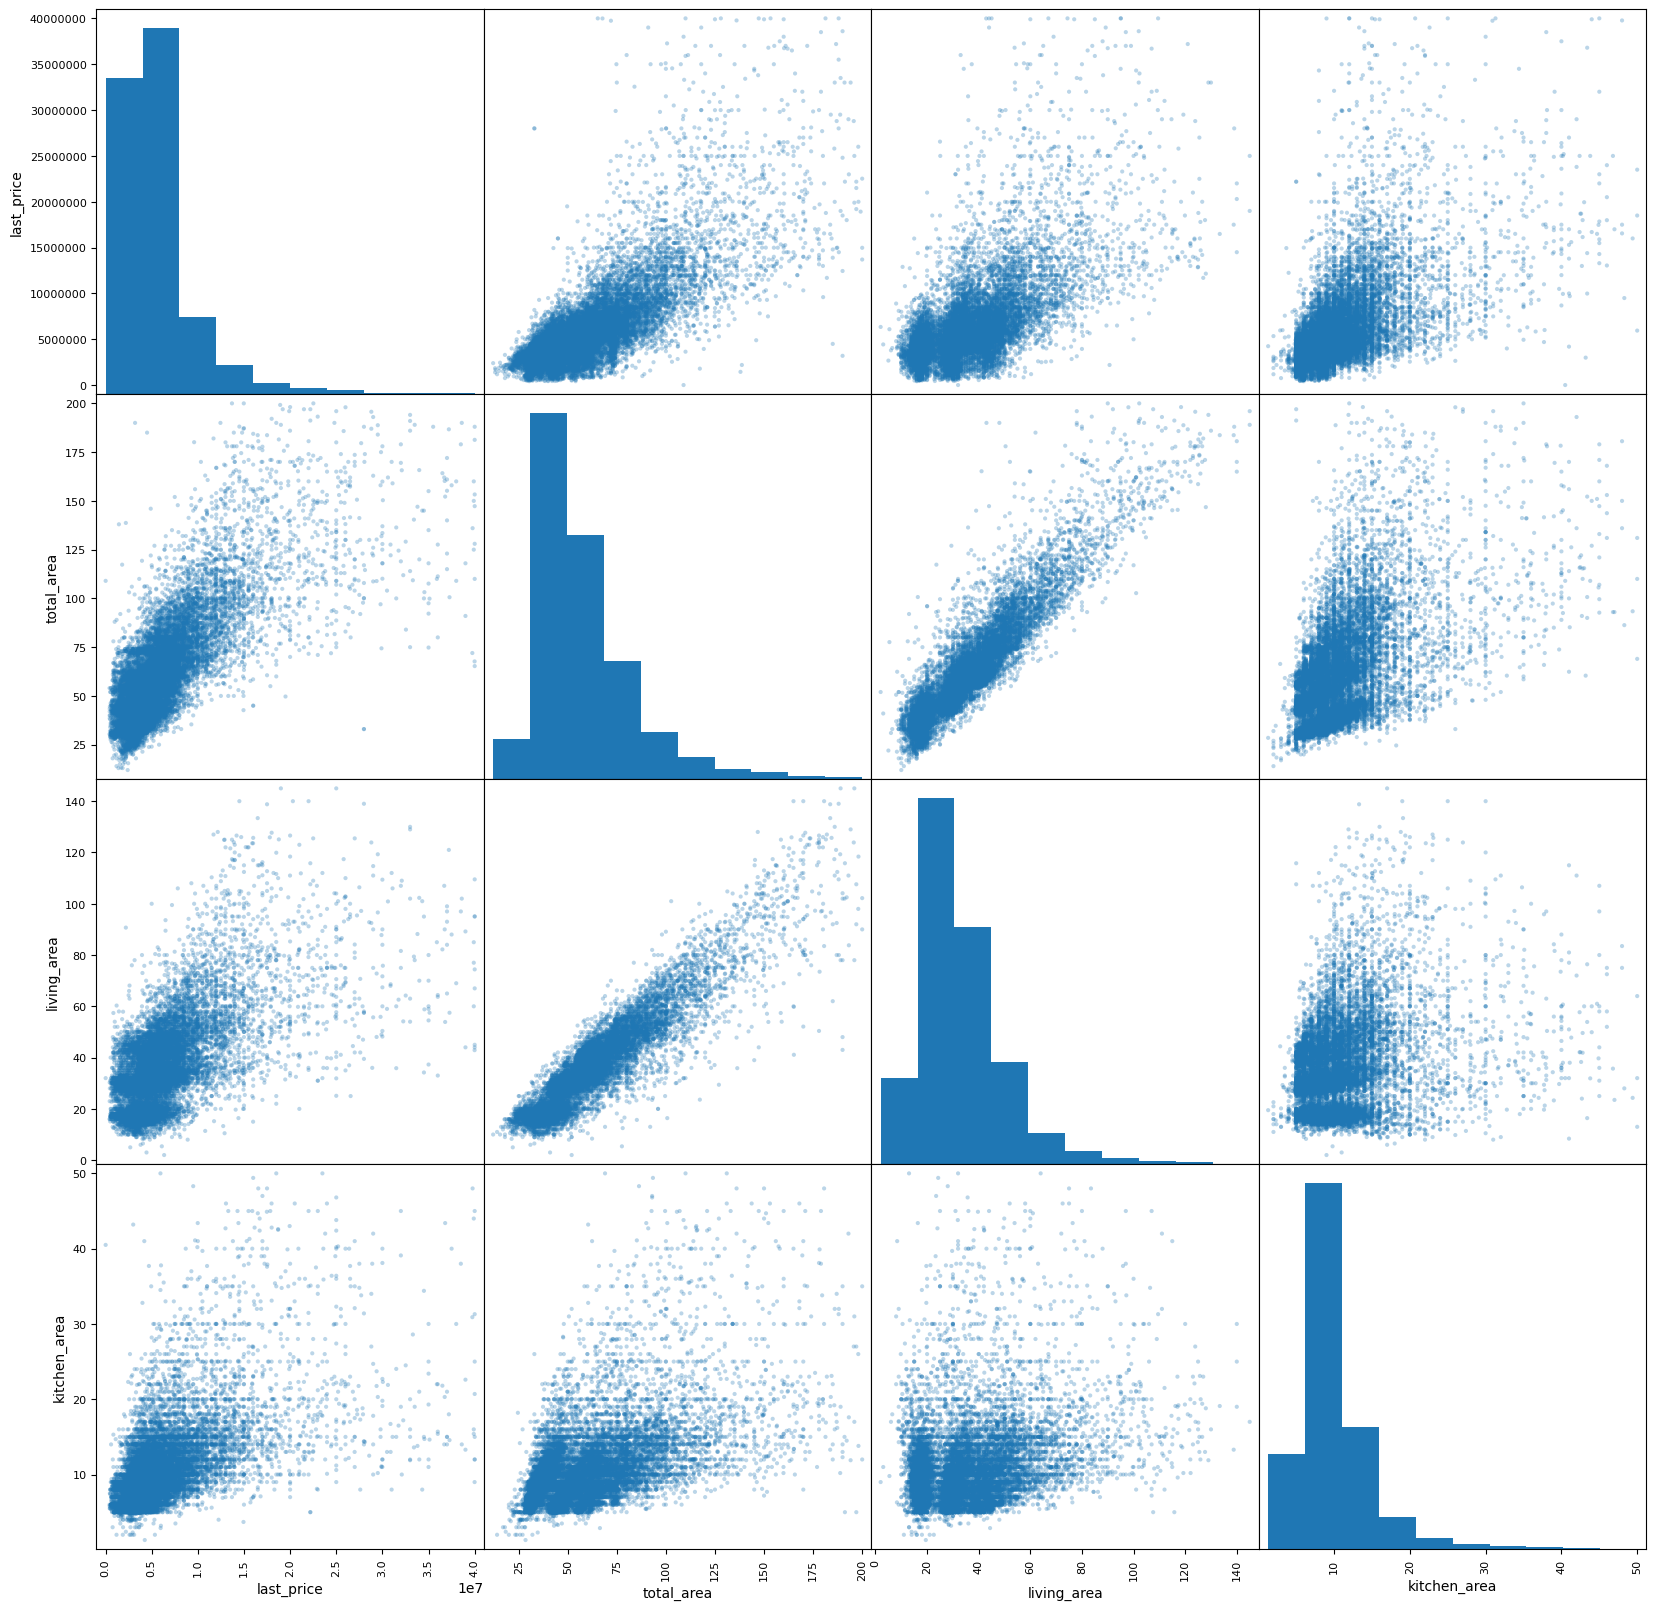

In [36]:
#pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'day_of_the_week', 'month', 'year']], figsize=(20, 20), alpha=0.3)
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'living_area', 'kitchen_area']], figsize=(20, 20), alpha=0.3)

**Вывод: из диаграмм рассеяния видно, что существует зависимоть общей цены квартиры от общей площади, жилой площади и площади кухни.**

**Построим столбчатую диаграмму зависимости средней цены от количества комнат:**

       count          mean      median
rooms                                 
0        172  3.004661e+06   2715000.0
1       7346  3.822009e+06   3600000.0
2       7134  5.486460e+06   4790000.0
3       5006  7.579027e+06   6176019.0
4        977  1.056971e+07   8650000.0
5        219  1.338797e+07  12300000.0
6         51  1.558439e+07  13500000.0
7         18  1.920278e+07  17650000.0
8          2  1.914500e+07  19145000.0
11         2  2.525000e+07  25250000.0


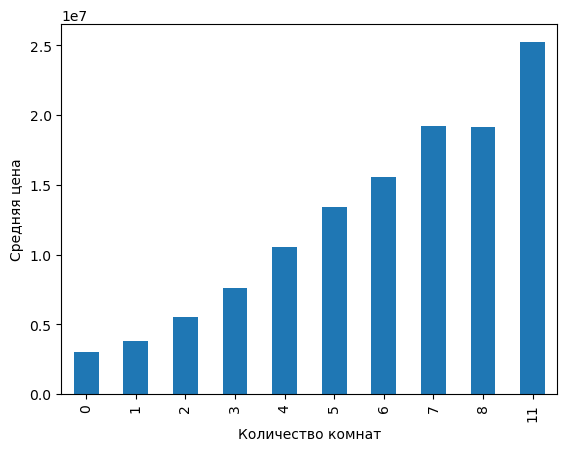

In [37]:
print (data.pivot_table(index='rooms', values='last_price', aggfunc=('mean', 'count', 'median'))) #выводим сводную таблицу
ax = data.pivot_table(index='rooms', values='last_price').plot(kind='bar',legend = False) #настраиваем диаграмму
ax.set (ylabel='Средняя цена', xlabel='Количество комнат') 
plt.show() 

**Вывод: Объявлений о квртирах с восемью и одиннадцатью комнатами всего 4, поэтому их можно не считать. 
    В остальном прослеживается близкая к линейной зависимоть средней цены от количества комнат.**

**Построим столбчатую диаграмму зависимости средней цены от категории этажа:**

                count          mean     median
floor_category                                
другой          15423  6.007653e+06  4800000.0
первый           2603  4.525684e+06  3900000.0
последний        2901  5.420794e+06  4243000.0


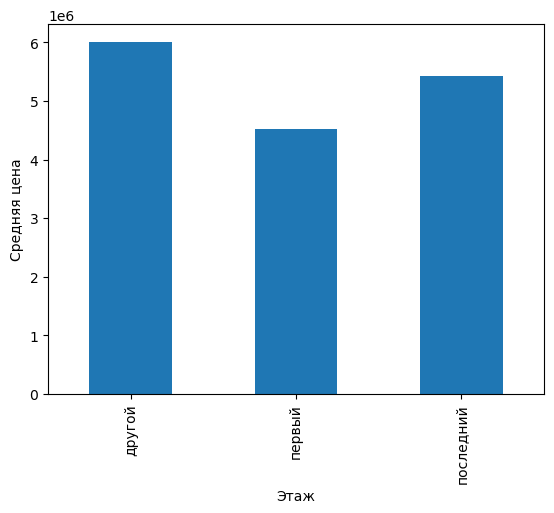

In [38]:
print (data.pivot_table(index='floor_category', values='last_price', aggfunc=('mean', 'count', 'median'))) #выводим сводную таблицу
ax = data.pivot_table(index='floor_category', values='last_price').plot(kind='bar',legend = False) #настраиваем диаграмму
ax.set (ylabel='Средняя цена', xlabel='Этаж') 
plt.show()

**Вывод: Зависимость средней цены от категории этажа есть, квартиры на первом этаже самые дешёвые, на последнем - дороже, чем на первом, но 
    дешевле, чем на других.**

**Построим столбчатую диаграмму зависимости средней цены от дня недели, в который подано объявление:**

                 count          mean     median
day_of_the_week                                
0                 3211  5.776668e+06  4600000.0
1                 3704  5.722257e+06  4700000.0
2                 3530  5.847279e+06  4670000.0
3                 3754  5.844662e+06  4600000.0
4                 3514  5.668733e+06  4500000.0
5                 1710  5.523109e+06  4500000.0
6                 1504  5.632837e+06  4500000.0


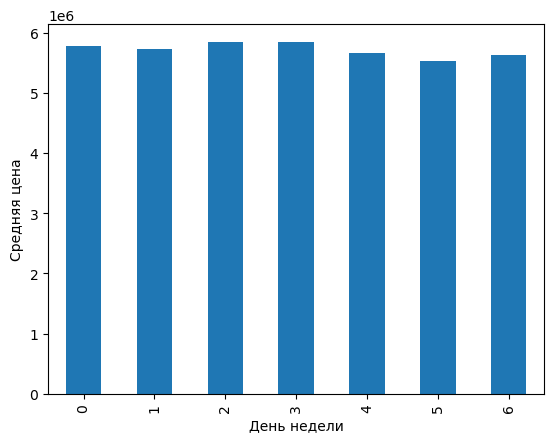

In [39]:
print (data.pivot_table(index='day_of_the_week', values='last_price', aggfunc=('mean', 'count', 'median')))#выводим сводную таблицу
ax = data.pivot_table(index='day_of_the_week', values='last_price').plot(kind='bar', legend = False)#настраиваем диаграмму
ax.set (ylabel='Средняя цена', xlabel='День недели' ) 
plt.show()

**Вывод: Зависимость средней цены от дня недели, в который подано оъявление, очень слабая. Наблюдается еле заметное снижение цены в выходные дни.**

       count          mean     median
month                                
1       1314  5.798603e+06  4600000.0
2       2294  5.822339e+06  4600000.0
3       2348  5.753724e+06  4600000.0
4       2127  5.690662e+06  4700000.0
5       1112  5.766446e+06  4500000.0
6       1557  5.641757e+06  4400000.0
7       1508  5.746725e+06  4550000.0
8       1541  5.762576e+06  4550000.0
9       1764  5.842708e+06  4675000.0
10      1909  5.525011e+06  4500000.0
11      2033  5.753229e+06  4600000.0
12      1420  5.830790e+06  4690000.0


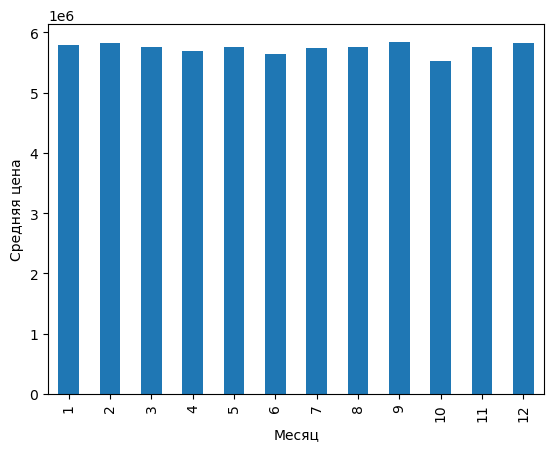

In [40]:
print (data.pivot_table(index='month', values='last_price', aggfunc=('mean', 'count', 'median'))) #выводим сводную таблицу
ax = data.pivot_table(index='month', values='last_price').plot(kind='bar', legend = False) #настраиваем диаграмму
ax.set (ylabel='Средняя цена', xlabel='Месяц' ) 
plt.show()

**Вывод: Зависимость средней цена от месяца подачи объявления очень слабая. Наблюдается небольшое снижение средней цены в октябре.**

**Построим столбчатую диаграмму зависимости средней цены от года подачи объявления:**

      count          mean     median
year                                
2014    102  9.691803e+06  7500000.0
2015    976  6.696711e+06  5198000.0
2016   2387  5.749537e+06  4490000.0
2017   7143  5.650524e+06  4500000.0
2018   7690  5.529252e+06  4500000.0
2019   2629  6.098046e+06  5000000.0


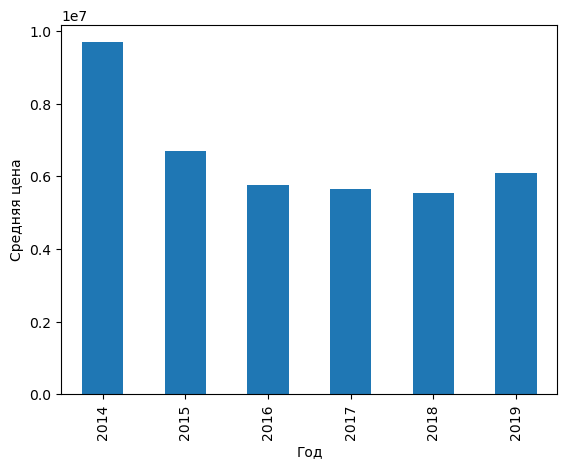

In [41]:
print (data.pivot_table(index='year', values='last_price', aggfunc=('mean', 'count', 'median'))) #выводим сводную таблицу
ax = data.pivot_table(index='year', values='last_price').plot(kind='bar', legend = False) #настраиваем диаграмму
ax.set (ylabel='Средняя цена', xlabel='Год' ) 
plt.show()

**Вывод: Зависимость средней цены от года подачи объявления есть. В 2014 году наблюдается пик, что довольно странно, а в 2018 - просадка средней цены. Из сводной таблицы видно, что есть данные только по 102 квартирам, выставленным в 2014 году, что является слишком малой выборкой.**

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [42]:
data\
.pivot_table(index='locality_name',values='price_per_meter', aggfunc=('count', 'mean'))\
.sort_values(by='count', ascending = False)\
.head(10)

,count,mean
locality_name,,
Санкт-Петербург,13861,111737.339264
Мурино,526,86777.864982
Кудрово,420,95568.407597
Шушары,384,79930.583059
Всеволожск,353,67661.953002
Пушкин,313,103287.821981
Парголово,296,90635.981482
Колпино,278,75443.337234
Гатчина,275,68538.951239


**Самая высокая стоимость квадратного метра - в Санкт-Петербурге.**
**Самая низкая стоимость квадратного метра - во Всеволожске**

**Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра:**

In [43]:
data\
.query('locality_name == "Санкт-Петербург"')\
.pivot_table(values='price_per_meter', index='km_to_cityCenter', aggfunc=('mean'))


,price_per_meter
km_to_cityCenter,
0.0,144796.235559
1.0,148787.159420
2.0,136495.959708
3.0,118034.729152
4.0,126946.115836
5.0,135379.396450
6.0,137353.460379
7.0,136842.817161
8.0,122717.975476


**Начиная с первого километра, стоимость квадратного метра уменьшается по мере удаления от центра города, что было ожидаемо.
Есть сомнения по поводу нулевого километра, который оказался в среднем дешевле первого. Возможно, дело в том, что в 
некоторых объявлениях в качестве адреса указан только город, но это требует дополнительных данных для проверки.**

**Выводы из части 4:**
      
      1) Общая площадь. Гистограмма показывает, что максимальное количество объявлений подано о квартирах площадью около 40        метров. Имеются несколько пиков в районе 25, 45, 60 и 75 квадратных метров. Думаю, эти пики соответствуют наиболее          распространенным площадям однокомнатных, двухкомнатных, трехкомнатных и т.д. квартир.
      2) Жилая площадь. Также имеется несколько пиков, которые смещены влево отновительно гистограммы общей площади, что          логично. Природа этих пиков должна быть такой же, как в предыдущем пункте.
      3) Площадь кухни.Распределение близко к нормальному. Наиболее распространена площадь кухни около 8 кв. метров.
      4) Цена объекта. Из гистограммы last_price следует, что больше всего квартир продано по цене около 4 млн. рублей. А         из столбца price_per_meter следует, что наиболее частая цена кв. метра - около 90 тыс.рублей.
      5) Количество комнат. Однокомнатных и двухкомнатных квартир продано примерно одинаковое количество. Трехкомнатных -          меньше на треть. Остальных значительно меньше. Максимальное количество комнат, судя по графику, - 6
      6) Высота потолков.Наиболее распространенная высота потолков - около 2,5 метров. Выше четырех метров потолков                практически нет.
      7) Этаж квартиры. Наиболее распространенный этаж - второй. Возможно, это связано с тем, что в Питере много                  малоэтажных      домов.
      8) Тип этажа квартиры («первый», «последний», «другой»). Лбъявдений о продаже квартир на первом и последнем этажах          примерно равное количество (около 1500), на первом этаже чуть меньшше, возможно, из-за магазинов. В категории              'другой' больше 7500 объявлений, то есть значительно больше.
      9) Общее количество этажей в доме. На гистограмме видны 2 высоких пика в районе 5 и 9 этажей. Предполагаю, что это         10) Расстояние до центра города в метрах. Гистограмма имеет 3 "холма". Предполагаю, что они соответствуют крупным            населенным пунктам.
      11) Расстояние до ближайшего аэропорта. Как и в предыдущем случае, гистограмма имеет 3 "холма". Предполагаю, что они        соответствуют крупным населенным пунктам.
      12) Расстояние до ближайшего парка. В большинстве объявлений, где указано расстояние до парка, оно составляет от 0 до        1000 метров. В среднем расстояние до ближайшего парка в таких объявлениях составляет примерно 500 метров.
      13) День и месяц публикации объявления. Из соответствующих гистограмм следует, что в выходные публикуется меньше            объявлений о продаже квартир. По месяцам ситуация следующая. Количество объявлений растёт с мая по март, в апреле          начинается спад. Имеет место резкое снижение количества поданных объявлений в декабре и январе (около Нового Года).
      14) Обычно продажа занимает от 50 до 240 дней, самое вероятное - это 102 дня.Продажи меньше 50 дней можно  считать быстрыми (но обычными), а больше 520 — необычно долгими.
      15) Существует заметная зависимость общей цены квартиры от общей площади, жилой площади, площади кухни, количества комнат, этажа и года подачи объявления. Зависимость цены от дня и месяца подачи объявления очень слабая. 
      16) Самая высокая стоимость квадратного метра - в Санкт-Петербурге (106589 р/кв.м), самая низкая стоимость квадратного метра - во Всеволожске (106589 р/кв.м).
      17) Начиная с первого километра, стоимость квадратного метра уменьшается по мере удаления от центра города, что было ожидаемо. Есть сомнения по поводу нулевого километра, который оказался в среднем дешевле первого. Возможно, дело в том, что в некоторых объявлениях в качестве адреса указан только город.

### Общий вывод

В целях нахождения интересных особенностей и зависимостей, которые существуют на рынке недвижимости, было проделано следующее:

1. Открыт файл с данными и изучена общая информация:
- Выведены на экран первые 10 строк датафрейма;
- Выведена информация о датафрейме;
- Построена общая гистограммы по всем числовым столбцам
- Сделаны выводы:
      1) В данных есть пропуски;
      2) На некоторых графиках видны несколько пиков, что требует более подробного анализа;
      3) Судя по большому размеру пустой области графиков, имеют место значения, сильно отличающиеся от большинства;
      4) Некоторые значения могли бы иметь другой тип данных по смыслу;
      5) Явные дубликаты в даннах отсутствуют.

2. Произведена предобработка данных:
- Определено, в каких столбцах есть пропуски;
- Пропуски в столбце "balcony" заменены на 0, так как если продавец не указал количество балконов, то их скорее всего нет; 
- Сделаны следующие выводы:
      1)В датафрейме достаточно много пропусков;
      2) Пропуски есть как в картографических данных, так и в заполняемых пользователем;
      3) Предположительно, пропуски в данных могут быть вызваны человеческим фактором, ошибками при выгрузке, либо сбоями в        алгоритме заполнения некоторых полей;
      4) В некоторых столбцах, таких как "is_apartment" пустых ячеек на порядок больше, чем заполненных.
- Изменены типы данных в 4 столбцах:
      1) last_price на int, так как нет смысла в копейках;
      2) balcony - на int по смыслу;
      3) first_day_exposition - на datetime по смыслу и для удобства последующих расчётов;
      4) is_apartment - на bool по смыслу и описанию данных.
- Изучены уникальные значения в столбце с названиями и устранены неявные дубликаты. Убраны такие слова, как "посёлок", "поселок", "село" и т.д., оставлены только имена собственные. В результате чего из 365 уникальных значений осталось 306;
- Найдены и устранены редкие и выбивающиеся значения в столбце ceiling_height, а именно все значения 20 и более разделены на 10, далее по итогам анализа датафрейма из него полностью удалены строки с высотой потолков меньше 2 метров и больше 5 метров, как являющиеся выбросами;
- Изучен столбец "last_price". Для этого выведено описание столбца, построена гистограмма и "ящик с усами". На основании последнего отсечены данные со значениями 13 млн. и более;
- Изучим столбцы, содержащие информацию о площади (total_area, living_area, kitchen_area). Для них выведено описание столбцов, построены гистограммы и "ящики с усами". В результате исследования были удалены из total_area значения больше 200, из living_area - больше 150, а из kitchen_area - больше 50.
- Изучена гистограмма столбца balcony и удалены строки со значениями в этом столбце больше 3. 
- Изучен столбец "total_images".  В результате удалены объявления, в которых меньше 2 или больше 20 изображений, так как в первом случае объявления не вызывают доверия, а объявлений с количеством изображений больше 20 крайне мало.
- Выведены гистограммы по получившемуся датафрейму
- Сделан вывод, что теперь гистограммы выглядят более реалистично. Пики могут объяснятся наличием в целом большего количества квартир определенной планировки и домов определенной этажности, а также нахождением домов в разных населенных пунктах.

3. Добавлены в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах, округленное до целых.

4. Проведен исследовательский анализ данных, а именно:
- Изучены следующие параметры объектов и сделаны выводы по отдельным парметрам:
      1) Общая площадь. Гистограмма показывает, что максимальное количество объявлений подано о квартирах площадью около 40        метров. Имеются несколько пиков в районе 25, 45, 60 и 75 квадратных метров. Думаю, эти пики соответствуют наиболее          распространенным площадям однокомнатных, двухкомнатных, трехкомнатных и т.д. квартир.
      2) Жилая площадь. Также имеется несколько пиков, которые смещены влево отновительно гистограммы общей площади, что          логично. Природа этих пиков должна быть такой же, как в предыдущем пункте.
      3) Площадь кухни.Распределение близко к нормальному. Наиболее распространена площадь кухни около 8 кв. метров.
      4) Цена объекта. Из гистограммы last_price следует, что больше всего квартир продано по цене около 4 млн. рублей. А         из столбца price_per_meter следует, что наиболее частая цена кв. метра - около 90 тыс.рублей.
      5) Количество комнат. Однокомнатных и двухкомнатных квартир продано примерно одинаковое количество. Трехкомнатных -          меньше на треть. Остальных значительно меньше. Максимальное количество комнат, судя по графику, - 6.
      6) Высота потолков.Наиболее распространенная высота потолков - около 2,5 метров. Выше четырех метров потолков                практически нет.
      7) Этаж квартиры. Наиболее распространенный этаж - второй. Возможно, это связано с тем, что в Питере много                  малоэтажных      домов.
      8) Тип этажа квартиры («первый», «последний», «другой»). Лбъявдений о продаже квартир на первом и последнем этажах          примерно равное количество (около 1500), на первом этаже чуть меньшше, возможно, из-за магазинов. В категории              'другой' больше 7500 объявлений, то есть значительно больше.
      9) Общее количество этажей в доме. На гистограмме видны 2 высоких пика в районе 5 и 9 этажей. Предполагаю, что это          связано с преобладание домов такой этажности в исследуемой области.
      10) Расстояние до центра города в метрах. Гистограмма имеет 3 "холма". Предполагаю, что они соответствуют крупным            населенным пунктам.
      11) Расстояние до ближайшего аэропорта. Как и в предыдущем случае, гистограмма имеет 3 "холма". Предполагаю, что они        соответствуют крупным населенным пунктам.
      12) Расстояние до ближайшего парка. В большинстве объявлений, где указано расстояние до парка, оно составляет от 0 до        1000 метров. В среднем расстояние до ближайшего парка в таких объявлениях составляет примерно 500 метров.
      13) День и месяц публикации объявления. Из соответствующих гистограмм следует, что в выходные публикуется меньше            объявлений о продаже квартир. По месяцам ситуация следующая. Количество объявлений растёт с мая по март, в апреле          начинается спад. Имеет место резкое снижение количества поданных объявлений в декабре и январе (около Нового Года).
- Построеы отдельные гистограммы для каждого из упомянутых параметров. 
- Изучен вопрос, как быстро продавались квартиры, для этого для столбца "days_exposition":
      1) Построена гистограмма;
      2) Посчитано среднее и медиана;
      3) Построен "ящик с усами";
      4) Сделан выводчто обычно продажа занимает от 50 до 240 дней, самое вероятное - это 102 дня.Продажи меньше 50 дней          можно  считать быстрыми (но обычными), а больше 520 — необычно долгими.
- Для ответа на вопрос, какие факторы больше всего влияют на общую (полную) стоимость объекта, сделано следующее:
      1) Построена матрица корреляции по 8 столбцам(последней цене; общей площади; жилой площади; площади кухни; количеству        комнат; дате размещения (день недели, месяц, год);
      2) Выведены диаграммы рассеяния по всем указанным числовым столбцам;
      3) Выведена диаграмма рассеяния для последней цены и категории этажа;
      4) Сделаны выводы, что существует зависимоть общей цены квартиры от общей площади, жилой площади, площади кухни, количества комнат и этажа. Зависимость цены от дня, месяца и года подачи объявления отсутствует (очень слабая). 
- Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, самая высокая стоимость квадратного метра - в Санкт-Петербурге (106589 р/кв.м), самая низкая стоимость квадратного метра - во Всеволожске (106589 р/кв.м).
- Выделены квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислены средние цены каждого километра. Начиная с первого километра, стоимость квадратного метра уменьшается по мере удаления от центра города, что было ожидаемо. Есть сомнения по поводу нулевого километра, который оказался в среднем дешевле первого. Возможно, дело в том, что в некоторых объявлениях в качестве адреса указан только город.